Found 1081 images belonging to 4 classes.
Found 269 images belonging to 4 classes.
Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 273s 8s/step - accuracy: 0.4082 - loss: 1.2714 - val_accuracy: 0.8104 - val_loss: 0.6890
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 222ms/step - accuracy: 0.7924 - loss: 0.6875 - val_accuracy: 0.8662 - val_loss: 0.4456
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 200ms/step - accuracy: 0.8301 - loss: 0.4835 - val_accuracy: 0.9108 - val_loss: 0.3347
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 225ms/step - accuracy: 0.8542 - loss: 0.4232 - val_accuracy: 0.9480 - val_loss: 0.2692
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 235ms/step - accuracy: 0.9087 - loss: 0.3225 - val_accuracy: 0.9591 - val_loss: 0.2200
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 9s 204ms/step - accuracy: 0.9238 - loss: 0.2532 - val_accuracy: 0.9777 - val_loss: 0.1917
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 231ms/step - accuracy: 0.9208 - loss: 0.2749 - val_accuracy: 0.9628 - val_loss: 0.1624
Epoch 8/20
34/34 ━━━━━

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 217ms/step


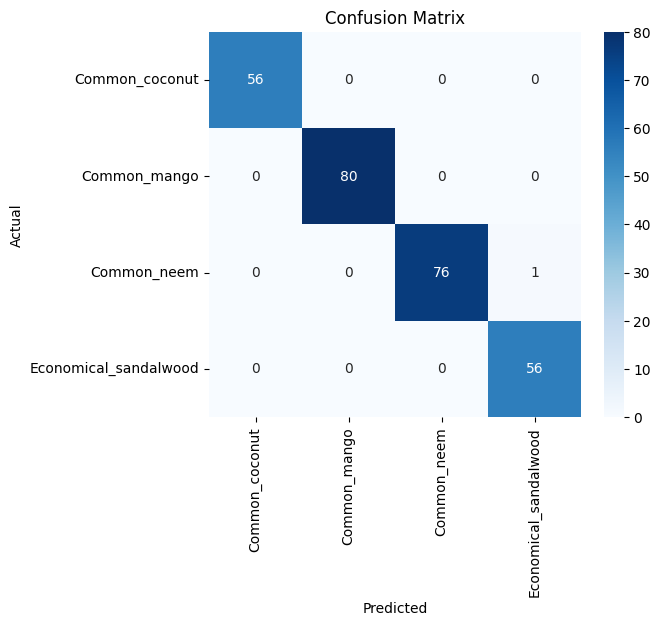

                       precision    recall  f1-score   support

       Common_coconut       1.00      1.00      1.00        56
         Common_mango       1.00      1.00      1.00        80
          Common_neem       1.00      0.99      0.99        77
Economical_sandalwood       0.98      1.00      0.99        56

             accuracy                           1.00       269
            macro avg       1.00      1.00      1.00       269
         weighted avg       1.00      1.00      1.00       269

Found 1081 images belonging to 4 classes.
Found 269 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 39s 422ms/step - accuracy: 0.2696 - loss: 1.6099 - val_accuracy: 0.6431 - val_loss: 1.2924
Epoch 2/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 21s 303ms/step - accuracy: 0.3166 - loss: 1.4132 - val_accuracy: 0.7100 - val_loss: 1.2187
Epoch 3/30
46/68 ━━━━━━━━━━━━━━━━━━━━ 6s 291ms/step - accuracy: 0.4172 - loss: 1.2735

KeyboardInterrupt: 

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix, classification_report
import cv2
from google.colab import files
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

# Define dataset path
train_dir = '/content/drive/MyDrive/Colab_Notebooks/Species/train'
test_dir = '/content/drive/MyDrive/Colab_Notebooks/Species/test'

# Data Preprocessing
img_size = (224, 224)
batch_size = 32

train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical'
)
test_data = test_datagen.flow_from_directory(
    test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=False
)

# Load VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Define Model
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
out = layers.Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=out)

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
epochs = 20
history = model.fit(train_data, validation_data=test_data, epochs=epochs)

# Save the Model
model.save('/content/drive/MyDrive/Colab_Notebooks/Species_classifier_model/tree_species_vgg16.h5')

# Evaluate Model
y_true = test_data.classes
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_data.class_indices.keys(), yticklabels=train_data.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_true, y_pred_classes, target_names=train_data.class_indices.keys()))

# Function to classify a single image
def classify_image(model, image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, img_size)
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    class_idx = np.argmax(prediction)
    class_label = list(train_data.class_indices.keys())[class_idx]

    plt.imshow(cv2.imread(image_path))
    plt.axis('off')
    plt.title(f'Predicted: {class_label}')
    plt.show()
    return class_label

# Upload and Classify Imageimport tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix, classification_report
import cv2
from google.colab import files
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

# Define dataset path
train_dir = '/content/drive/MyDrive/Colab_Notebooks/Species/train'
test_dir = '/content/drive/MyDrive/Colab_Notebooks/Species/test'

# Data Preprocessing
img_size = (224, 224)
batch_size = 16  # Reduced batch size to enhance learning with limited data

data_augmentation = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_data = data_augmentation.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical'
)
test_data = test_datagen.flow_from_directory(
    test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=False
)

# Load VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model for transfer learning

# Define Model
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(256, activation='relu')(x)  # Increased dense layer size
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
out = layers.Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=out)

# Compile Model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
epochs = 30  # Increased epochs for better learning
history = model.fit(train_data, validation_data=test_data, epochs=epochs)

# Save the Model
model.save('/content/drive/MyDrive/Colab_Notebooks/Species_classifier_model/tree_species_vgg16.h5')

# Evaluate Model
y_true = test_data.classes
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_data.class_indices.keys(), yticklabels=train_data.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_true, y_pred_classes, target_names=train_data.class_indices.keys()))

# Function to classify a single image
def classify_image(model, image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, img_size)
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    class_idx = np.argmax(prediction)
    class_label = list(train_data.class_indices.keys())[class_idx]

    plt.imshow(cv2.imread(image_path))
    plt.axis('off')
    plt.title(f'Predicted: {class_label}')
    plt.show()
    return class_label

# Upload and Classify Image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
predicted_class = classify_image(model, image_path)
print(f'Predicted Class: {predicted_class}')
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
predicted_class = classify_image(model, image_path)
print(f'Predicted Class: {predicted_class}')


Saving 27.jpg to 27.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


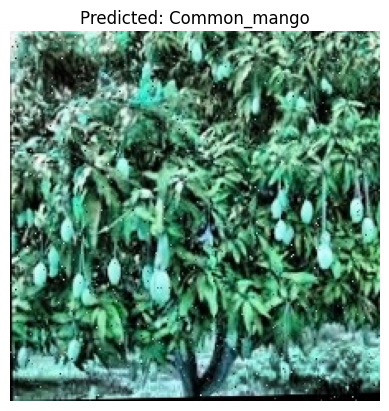

Predicted Class: Common_mango


Saving 24.jpg to 24.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


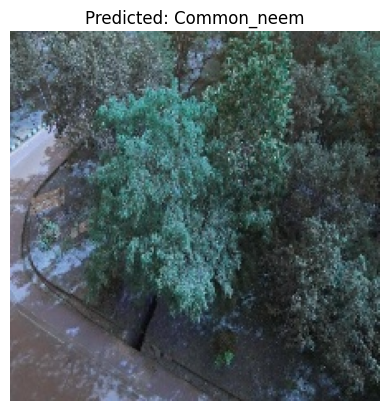

Predicted Class: Common_neem


In [5]:
def classify_image(model, image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, img_size)
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    class_idx = np.argmax(prediction)
    class_label = list(train_data.class_indices.keys())[class_idx]

    plt.imshow(cv2.imread(image_path))
    plt.axis('off')
    plt.title(f'Predicted: {class_label}')
    plt.show()
    return class_label

# Upload and Classify Image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
predicted_class = classify_image(model, image_path)
print(f'Predicted Class: {predicted_class}')
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
predicted_class = classify_image(model, image_path)
print(f'Predicted Class: {predicted_class}')
